In [9]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pommel

In [41]:
# get the compression and activity values
memories = ["ddr3", "ddr3l", "ddr4", "lpddr2", "lpddr3"]
compression_ratios = np.arange(1.0, 3.25, 0.25)
activities = [0.1, 0.5]

# load all the reports
#reports = []
#for cr in compression_ratios:
#    for a in activities:
#        reports.append(pommel.report(f"outputs/bandwidth_cr_{cr}_activity_{a}/report.json"))


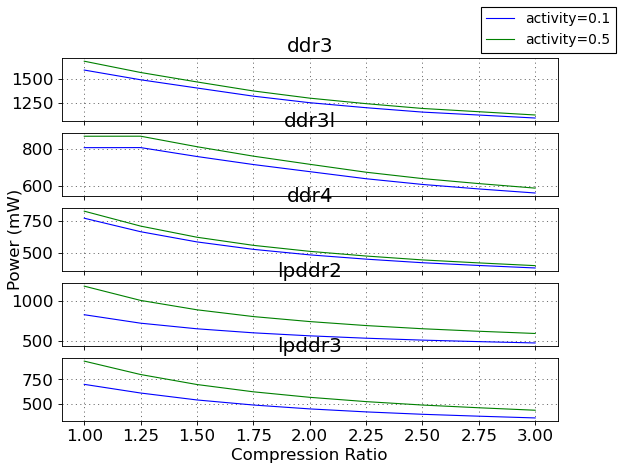

In [45]:
# create plots
fig, axs = plt.subplots(len(memories))#, sharey="col")
for i, memory in enumerate(memories):
    ax = axs[i]
    for a in activities:
        crs = []
        power = []
        for cr in compression_ratios:
            report = pommel.report(f"outputs/bandwidth_memory_{memory}_cr_{cr}_activity_{a}/report.json")
            power.append(report.get_total_power_sequence()[0])
        ax.plot(compression_ratios, power, label=f"activity={a}")
        ax.grid()
        ax.set_title(memory)
        ax.set_xlabel("Compression Ratio")
        
# sort out axis
for ax in axs.flat:
    ax.grid()
    ax.label_outer()
    
# legend
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')

# add a big axis, hide frame
fig.add_subplot(111, frameon=False)

# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)

# set ylabel
plt.ylabel("Power (mW)")

plt.show()